# Comparing Ed Sheeran's songs with rest of the dataset

In the previous notebook it was determined that Ed Sheeran is the most listened artist and 4 of his songs made it to the top 50 playlist. So here his songs will be compared with the rest of the songs just to see the varitions existing among them.

In [12]:
!pip install similaritymeasures

  Created wheel for similaritymeasures: filename=similaritymeasures-0.4.2-cp37-none-any.whl size=14589 sha256=d286f0e983ab74d81043866c75f475dffb6b7ea55662625d4117f5dd35141eb6
  Stored in directory: C:\Users\Admin\AppData\Local\pip\Cache\wheels\c5\be\2a\83c6661d4b2cea33cd77c28764985376af69c262a70b7e2c18
Successfully built similaritymeasures


In [18]:
#importing required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import similaritymeasures
from math import*

In [2]:
#loading dataset in datframe
df = pd.read_csv(r'spotify.csv',encoding='latin-1')
df.head()

,Track_Name,Artist_Name,Genre,Beats_Per_Minute,Energy,Danceability,Loudness_dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [3]:
#loading Ed sheeran's song onto a datframe
new_df = pd.DataFrame()
new_df = df.loc[df['Artist_Name'] == 'Ed Sheeran']
new_df.head()

,Track_Name,Artist_Name,Genre,Beats_Per_Minute,Energy,Danceability,Loudness_dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
5,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
37,Antisocial (with Travis Scott),Ed Sheeran,pop,152,82,72,-5,36,91,162,13,5,87
49,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,95,79,75,-6,7,61,206,21,12,82


## Comparing mean values

Mean value for valence: 54.6
Mean value for valence (Ed Sheeran): 72.75


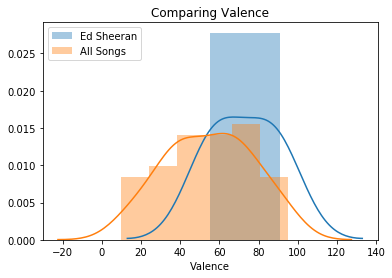

In [4]:
plt.title('Comparing Valence')
print("Mean value for valence:", df['Valence'].mean())
print("Mean value for valence (Ed Sheeran):", new_df['Valence'].mean())
sns.distplot(new_df['Valence'])
sns.distplot(df['Valence'])
plt.legend(labels=['Ed Sheeran','All Songs'])
plt.show()

Mean value for valence: 71.38
Mean value for valence (Ed Sheeran): 72.75


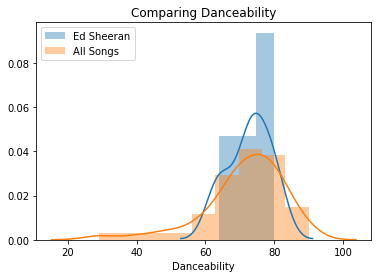

In [5]:
plt.title('Comparing Danceability')
print("Mean value for valence:", df['Danceability'].mean())
print("Mean value for valence (Ed Sheeran):", new_df['Danceability'].mean())
sns.distplot(new_df['Danceability'], label = "Ed Sheeran")
sns.distplot(df['Danceability'] , label = "All songs")
plt.legend(labels=['Ed Sheeran','All Songs'])
plt.show()

Mean value for Energy: 64.06
Mean value for Energy (Ed Sheeran): 73.5


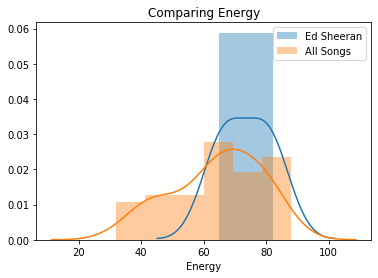

In [6]:
plt.title('Comparing Energy')
print("Mean value for Energy:", df['Energy'].mean())
print("Mean value for Energy (Ed Sheeran):", new_df['Energy'].mean())
sns.distplot(new_df['Energy'], label = "Ed Sheeran")
sns.distplot(df['Energy'] , label = "All songs")
plt.legend(labels=['Ed Sheeran','All Songs'])
plt.show()

## Mean Values of song attributes for music made by Ed Sheeran 

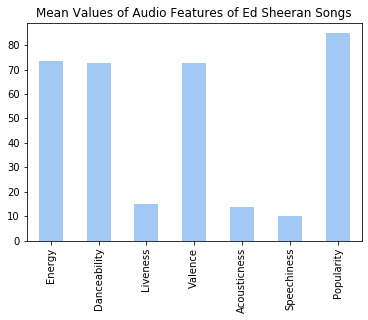

In [10]:
numeric = new_df.drop(['Track_Name','Artist_Name', 'Genre'], axis=1)
small = numeric.drop(['Length','Loudness_dB','Beats_Per_Minute'], axis=1)
sns.set_palette('pastel')
small.mean().plot.bar()
plt.title('Mean Values of Audio Features of Ed Sheeran Songs')
plt.show()

In [14]:
# quantify the difference between the two curves using PCM
pcm = similaritymeasures.pcm(df, new_df)

# quantify the difference between the two curves using
# Discrete Frechet distance
df = similaritymeasures.frechet_dist(df, new_df)

# quantify the difference between the two curves using
# area between two curves
area = similaritymeasures.area_between_two_curves(df, new_df)

# quantify the difference between the two curves using
# Curve Length based similarity measure
cl = similaritymeasures.curve_length_measure(df, new_df)

# quantify the difference between the two curves using
# Dynamic Time Warping distance
dtw, d = similaritymeasures.dtw(df, new_df)

# print the results
print(pcm, df, area, cl, dtw)


TypeError: '(slice(None, None, None), 0)' is an invalid key

## Finding similarity between Ed Sheeran's music with rest of the dataset

In [21]:
#defining functions of similarity
def euclidean_distance(x,y):
    return sqrt(sum(pow(a-b,2) for a, b in zip(x,y)))

def manhattan_distance(x,y):
    return sum(abs(a-b) for a,b in zip(x,y))

def jaccard_similarity(x,y):
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

### Similarity for Danceability

In [22]:
a = euclidean_distance(new_df['Danceability'], df['Danceability'])
print(a)

b = manhattan_distance(new_df['Danceability'], df['Danceability'])
print(b)

c = jaccard_similarity(new_df['Danceability'], df['Danceability'])
print(c)

35.91656999213594
56
0.13793103448275862


### Similarity of Energy

In [23]:
a = euclidean_distance(new_df['Energy'], df['Energy'])
print(a)

b = manhattan_distance(new_df['Energy'], df['Energy'])
print(b)

c = jaccard_similarity(new_df['Energy'], df['Energy'])
print(c)

21.656407827707714
39
0.12903225806451613


### Similarity for Valence

In [24]:
a = euclidean_distance(new_df['Valence'], df['Valence'])
print(a)

b = manhattan_distance(new_df['Valence'], df['Valence'])
print(b)

c = jaccard_similarity(new_df['Valence'], df['Valence'])
print(c)

37.49666651850535
70
0.10256410256410256
